# Matplotlib

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#ax.plot" data-toc-modified-id="ax.plot-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>ax.plot</a></span></li><li><span><a href="#Plotting-time-series" data-toc-modified-id="Plotting-time-series-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plotting time-series</a></span></li><li><span><a href="#annotate" data-toc-modified-id="annotate-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>annotate</a></span></li><li><span><a href="#Stacked-bar-chart" data-toc-modified-id="Stacked-bar-chart-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Stacked bar chart</a></span></li><li><span><a href="#histograms" data-toc-modified-id="histograms-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>histograms</a></span></li><li><span><a href="#Adding-error-bars" data-toc-modified-id="Adding-error-bars-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Adding error-bars</a></span></li><li><span><a href="#Box-plot" data-toc-modified-id="Box-plot-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Box plot</a></span></li><li><span><a href="#scatter-plots" data-toc-modified-id="scatter-plots-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>scatter plots</a></span></li><li><span><a href="#share-with-others" data-toc-modified-id="share-with-others-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>share with others</a></span></li></ul></div>

- learn how to create visualizations for different kinds of data and how to customize, automate, and share these visualizations.

In [1]:
# Import pandas
import pandas as pd 

# Read 'Bronze.csv' into a DataFrame: bronze
bronze = pd.read_csv('Summer_Olympic_medals/Bronze.csv')

# Read 'Silver.csv' into a DataFrame: silver
silver = pd.read_csv('Summer_Olympic_medals/Silver.csv')

# Read 'Gold.csv' into a DataFrame: gold
gold = pd.read_csv('Summer_Olympic_medals/Gold.csv')

# Print the first five rows of gold

for i in [gold, silver, bronze]:
    i.pop('Country')

total = pd.merge(\
                 pd.merge(gold, silver, on='NOC', suffixes=('_g', '_s')),
                 bronze, on='NOC')
total.columns=['NOC', 'G', 'S', 'B']
total = total.dropna(subset=['G'])

total = total[(total.G>=200) & (total.S>=200) & (total.B>=200)]

## ax.plot

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import jupyterthemes.jtplot as jtplot
%matplotlib inline
jtplot.style(theme='onedork')

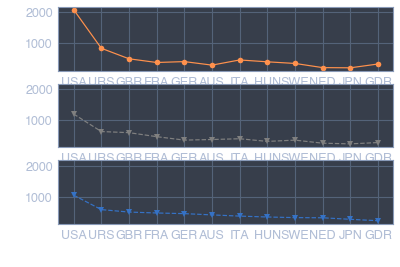

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3,1, sharey=True)


ax[0].plot(total["NOC"], total["G"], color='y', marker='o')
ax[1].plot(total["NOC"], total["S"], color='gray',marker='v', linestyle='--')
ax[2].plot(total["NOC"], total["B"], color='b',marker='v', linestyle='--')

for i in range(3):
    
    ax[i].set_xlabel('NOC', color='white')

    ax[i].set_ylabel('number', color='white')

plt.show()

## Plotting time-series

In [4]:
import pandas as pd

# Load 'sales-jan-2015.csv' into a DataFrame: jan
jan = pd.read_csv('Sales/sales-jan-2015.csv', parse_dates=True, index_col='Date')

# Load 'sales-feb-2015.csv' into a DataFrame: feb
feb = pd.read_csv('Sales/sales-feb-2015.csv', parse_dates=True, index_col='Date')

# Load 'sales-mar-2015.csv' into a DataFrame: mar
mar = pd.read_csv('Sales/sales-mar-2015.csv', parse_dates=True, index_col='Date')

q1 = pd.concat([jan, feb, mar])

In [5]:
q1 = q1.sort_index()

In [6]:
# Define a function called plot_timeseries
def plot_timeseries(axes, x, y, color, xlabel, ylabel):
  # Plot the inputs x,y in the provided color
  axes.plot(x, y, color=color)
  # Set the x-axis label
  axes.set_xlabel(xlabel)
  # Set the y-axis label
  axes.set_ylabel(ylabel, color=color)
  # Set the colors tick params for y-axis
  axes.tick_params('y', colors=color)

/Users/ellick/anaconda3/envs/datacamp/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


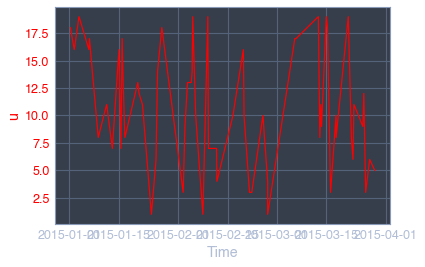

In [7]:
fig, ax=plt.subplots()
plot_timeseries(ax, q1.index, q1.Units, 'red', 'Time', 'u')

## annotate

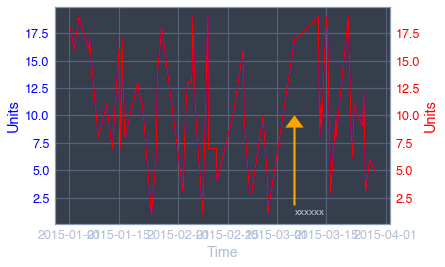

In [45]:
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, q1.index, q1.Units, 'blue', "Time", "Units")

# Create an Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, q1.index, q1.Units, 'red', "Time", "Units")

# Annotate point with relative temperature >1 degree
ax2.annotate("xxxxxx", xy=(pd.Timestamp('2015-03-06'), 10), xytext=(pd.Timestamp('2015-03-06'), 1),
             arrowprops={#'arrowstyle': '-|>',
                         'color': 'orange',
                         'width': 2,
                        'headwidth' : 18})

plt.show()

## Stacked bar chart

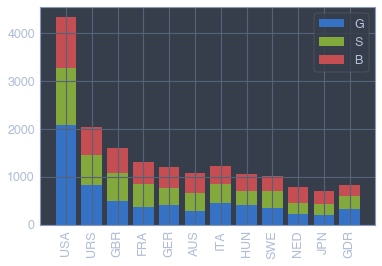

In [17]:
fig, ax = plt.subplots()
# Add bars for "Gold" with the label "Gold"
ax.bar(total.NOC, total.G)#, label='Gold')

# Stack bars for "Silver" on top with label "Silver"
ax.bar(total.NOC, total.S, bottom=total.G)#, label='Silver')

# Stack bars for "Bronze" on top of that with label "Bronze"
ax.bar(total.NOC, total.B, bottom=total.G+total.S)#, label='Bronze')

ax.set_xticklabels(total.NOC, rotation=90)
# Display the legend
ax.legend(['G', 'S', 'B'])

plt.show()

## histograms

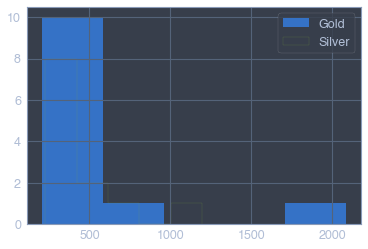

In [36]:
fig, ax = plt.subplots()

# Plot a histogram of "Weight" for mens_rowing
ax.hist(total.G, label='Gold', histtype='bar', bins=5)

# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(total.S, label='Silver', histtype='step',bins=5)

ax.set_xlabel('')
ax.set_ylabel("")

# Add the legend and show the Figure
ax.legend()
plt.show()

## Adding error-bars

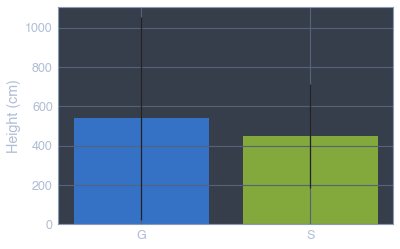

In [41]:
fig, ax = plt.subplots()

# Add a bar for the rowing "Height" column mean/std
ax.bar("G",  total.G.mean(), yerr=total.G.std())

# Add a bar for the gymnastics "Height" column mean/std
ax.bar("S", total.S.mean(), yerr=total.S.std())

# Label the y-axis
ax.set_ylabel("Height (cm)")

plt.show()

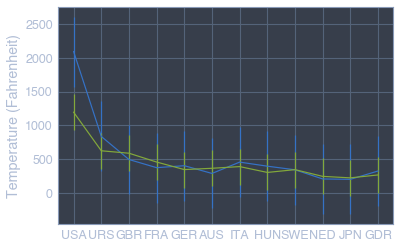

In [42]:
fig, ax = plt.subplots()


# Add Seattle temperature data in each month with error bars
ax.errorbar(total.NOC, total.G, yerr=total.G.std())#, yerr=seattle_weather['MLY-TAVG-STDDEV'])

# Add Austin temperature data in each month with error bars
ax.errorbar(total.NOC, total.S, yerr=total.S.std())#, yerr=austin_weather['MLY-TAVG-STDDEV']) 

# Set the y-axis label
ax.set_ylabel('Temperature (Fahrenheit)')

plt.show()

## Box plot

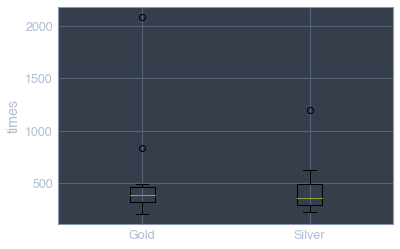

In [44]:
fig, ax = plt.subplots()

# Add a boxplot for the "Height" column in the DataFrames
ax.boxplot([total.G, total.S])

# Add x-axis tick labels:
ax.set_xticklabels(["Gold", "Silver"])

# Add a y-axis label
ax.set_ylabel("times")

plt.show()

## scatter plots

In [47]:
import pandas as pd

# Load 'sales-jan-2015.csv' into a DataFrame: jan
jan = pd.read_csv('Sales/sales-jan-2015.csv', parse_dates=True, index_col='Date')

# Load 'sales-feb-2015.csv' into a DataFrame: feb
feb = pd.read_csv('Sales/sales-feb-2015.csv', parse_dates=True, index_col='Date')

# Load 'sales-mar-2015.csv' into a DataFrame: mar
mar = pd.read_csv('Sales/sales-mar-2015.csv', parse_dates=True, index_col='Date')

q1 = pd.concat([jan, feb, mar])

In [67]:
q1=q1.sort_index()
q1.head()

,Company,Product,Units
Date,,,
2015-01-01 07:31:20,Acme Coporation,Software,18
2015-01-02 09:51:06,Hooli,Hardware,16
2015-01-03 18:00:19,Hooli,Service,19
2015-01-06 13:47:37,Acme Coporation,Software,16
2015-01-06 17:19:34,Initech,Hardware,17


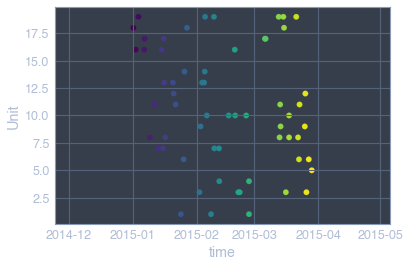

In [66]:
fig, ax = plt.subplots()

# Add data: "co2" on x-axis, "relative_temp" on y-axis
ax.scatter(q1['2015-01':'2015-03'].index, q1['2015-01':'2015-03']['Units'], c=q1['2015-01':'2015-03'].index)

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel("time")

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel("Unit")

plt.show()

## share with others
- [範例庫](https://matplotlib.org/3.1.1/gallery/index.html)

In [ ]:
# fig.savefig('my_figure.png')

# Save as a PNG file with 300 dpi
# fig.savefig('my_figure_300dpi.png', dpi=300)

# fig.savefig('my_figure_300dpi.jpg', quality=50)

# Set figure dimensions and save as a PNG
# fig.set_size_inches([5,3])
# fig.savefig('figure_5_3.png')